# Introduction Bayesian Methods

**Author: Simon Haxby**

This module is meant to provide a practical, minimal introduction to Bayesian inference and modeling. I assume that one already has exposure to basic frequentists concepts for estimation and hypothesis testing, i.e: MLEs, CIs, p-values etc.

1. Posteriors
2. Estimation
3. Decision Theory
4. Model Selection/Averaging

## Posteriors
For Bayesian the primary construction in inference and testing is the posterior which is derived using Bayes' Rule. 

$$P(\theta|X) = \frac{P(X|\theta)P(\theta)}{\int_\theta P(X|\theta)P(\theta)d\theta} $$

Here $X$ represents our observations and $\theta$ is a parameter of interest; usually related to the distribution that is used to model $X$. Here $P(\theta)$ is our prior distribution over $\theta$; which is to say we can account for prior beliefs about $\theta$ into our model of $\theta$ after having observed our data $X$.

One of the alluring features of Bayesian methods is that most techniques are simple applications of the posterior distribution of $\theta$. Infering the optimal estimator of $\theta$, predicting new data, selecting models or hypothesis all fall under this characterization.

For example:

1. New data prediction:
    $$P(x\ |X) = \int_\theta P(x\ |X, \theta)\color{Red}{P(\theta|X)}d\theta$$
2. Picking optimal estimator, $\hat{\theta}$, by mimizing:
    $$ E_{\theta|X}[L(\theta, \hat{\theta})]= \int_\theta L(\theta, \hat{\theta})\color{Red}{P(\theta|X)}d\theta$$
3. Comparing two models:
    $$ \frac{P(M_1 |X)}{P(M_2 |X)} = \frac{P(M_1)\int_{\theta_1} P(M_1 |X, \theta_1)\color{Red}{P(\theta_1|X)}d\theta_1}{P(M_2)\int_{\theta_2} P(M_2 |X, \theta_2)\color{Red}{P(\theta_2|X)}d\theta_2}$$
    
Where $\color{Red}{P(\theta|X)}$ are our posteriors. The examples listed above will be explained in more detail below

## Estimation

Estimating parameters in Bayesian models can be done a number of ways; choice of method can depend on problem tractability, availibility of computational resources and prior information about parameters.

In [239]:
import warnings
import numpy as np
import scipy as sp
import emcee
import corner
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

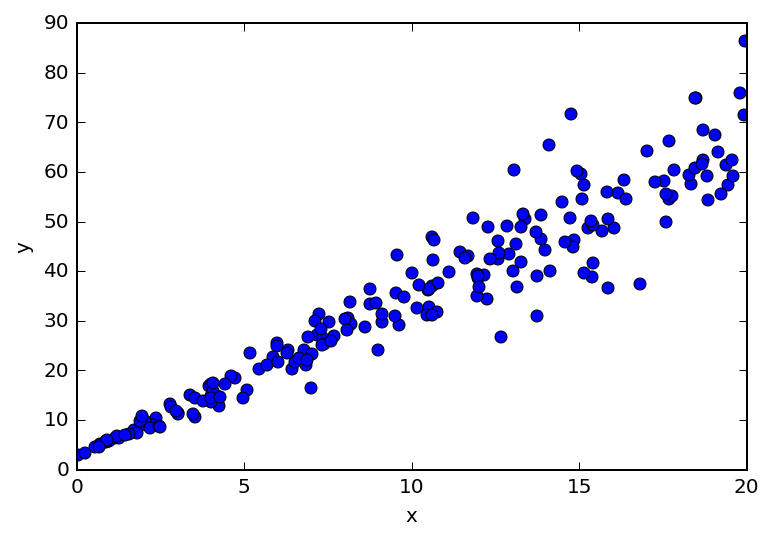

In [242]:
N = 200
m = np.pi
b = np.e

x = np.random.uniform(0,20,N)
y_var = .5*x
epilson = np.random.randn(N)*y_var
y = m*x + b + epilson
plt.plot(x, y, 'bo');
plt.xlabel('x');
plt.ylabel('y');

In [243]:
def lnlike(theta, x, y):
    m, b, y_base, y_hetero = theta
    y_var = y_base + y_hetero*x
    model = m*x+b
    return -.5*np.sum(((model-y)**2/y_var**2) + np.log(2*np.pi*y_var**2)) 

def lnprior(theta):
    m, b, y_base, y_hetero = theta
    if m > 0 and 0 < y_base < 50 and 0 < y_hetero < 1:
        return 0.0
    else:
        return -np.inf

def lnpost(theta, x, y):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y)

In [244]:
ndim, nwalkers = 4, 100
pos = [1 + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnpost, args=(x, y))
sampler.run_mcmc(pos, 15000);

In [245]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
theta_hat = np.mean(samples[-10000:], axis=0)
theta_hat

array([ 3.18376791,  2.73116503,  0.03510293,  0.47119747])

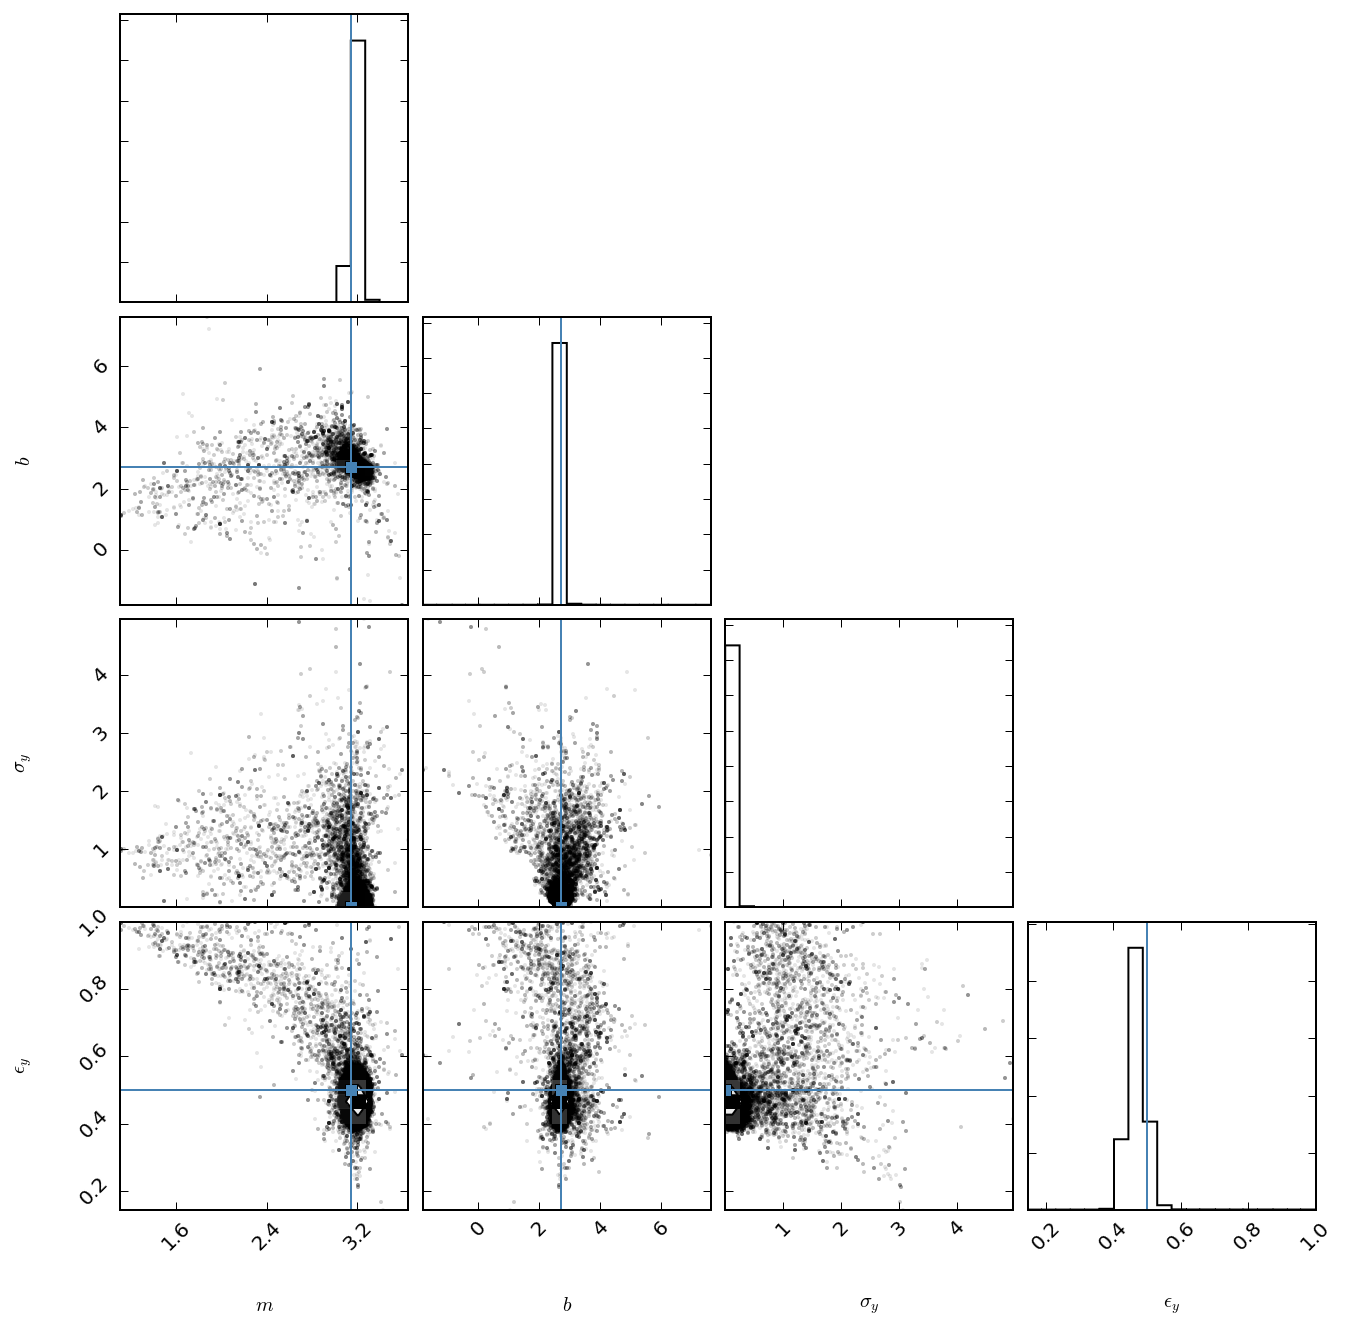

In [254]:
fig = corner.corner(samples, labels=["$m$", "$b$", "$\sigma_y$", "$\epsilon_y$"],
                      truths=[m, b, 0, .5], plot_contours=False)

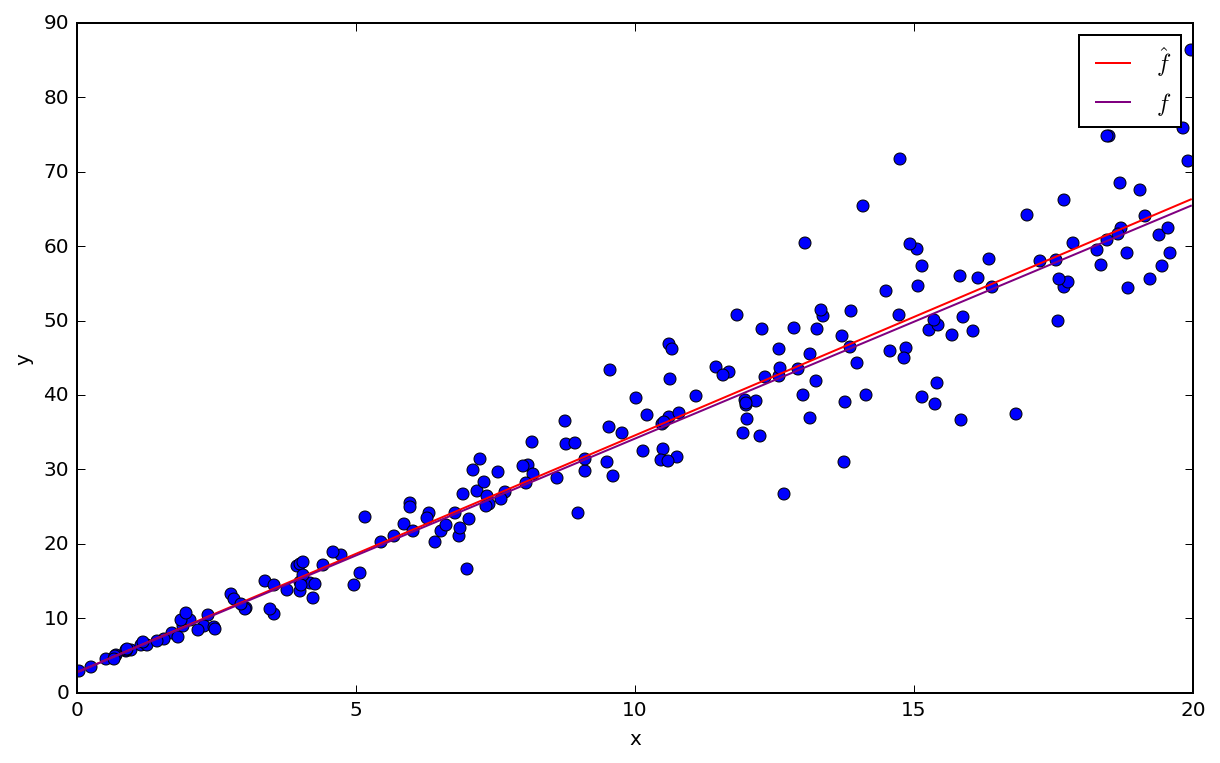

In [247]:
t = np.linspace(min(x), max(x), 1000)
f_approx = lambda t: theta_hat[0]*t + theta_hat[1]
f = lambda t: m*t + b

plt.figure(figsize=(10,6))
plt.plot(x, y, 'bo');
plt.plot(t, f_approx(t), 'red', label="$\hat{f}$")
plt.plot(t, f(t), 'purple', label = '$f$')
plt.xlabel('x');
plt.ylabel('y');
plt.legend();

## TODO

* Notes on posterior and prior choices
* Catch warnings
* Use loss to infer optimal parameters
* Use PyMC for discrete model